In [19]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path)

testdata = load_data('adult_test.csv')
traindata = load_data('adult_train.csv')

Ytest = testdata['target']
Ytrain = traindata['target']
Xtest = testdata.drop('target', axis=1)
Xtrain = traindata.drop('target', axis=1)

# TASK 2
### Step 1

In [20]:
from matplotlib import pyplot as plt

def plot_classifier_scores(train_scores, test_scores, trees=0):
    # Sort the depths for proper plotting
    train_depths = sorted(train_scores.keys())
    test_depths = sorted(test_scores.keys())

    # Get the corresponding scores
    train_y = [train_scores[d] for d in train_depths]
    test_y = [test_scores[d] for d in test_depths]

    # Plot the lines
    plt.figure(figsize=(12, 10))
    plt.plot(train_depths, train_y, label='Train Classifier', marker='o')
    plt.plot(test_depths, test_y, label='Test Classifier', marker='s')

    # Add labels and title
    plt.xlabel('Depth of Classifier')
    plt.ylabel('Evaluation Score (Accuracy)')
    if trees > 0:
        plt.title(f'Classifier Evaluation Scores vs Depth (Trees: {trees})')
    else:
        plt.title('Classifier Evaluation Scores vs Depth')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.6, 1.0)
    plt.show()
    

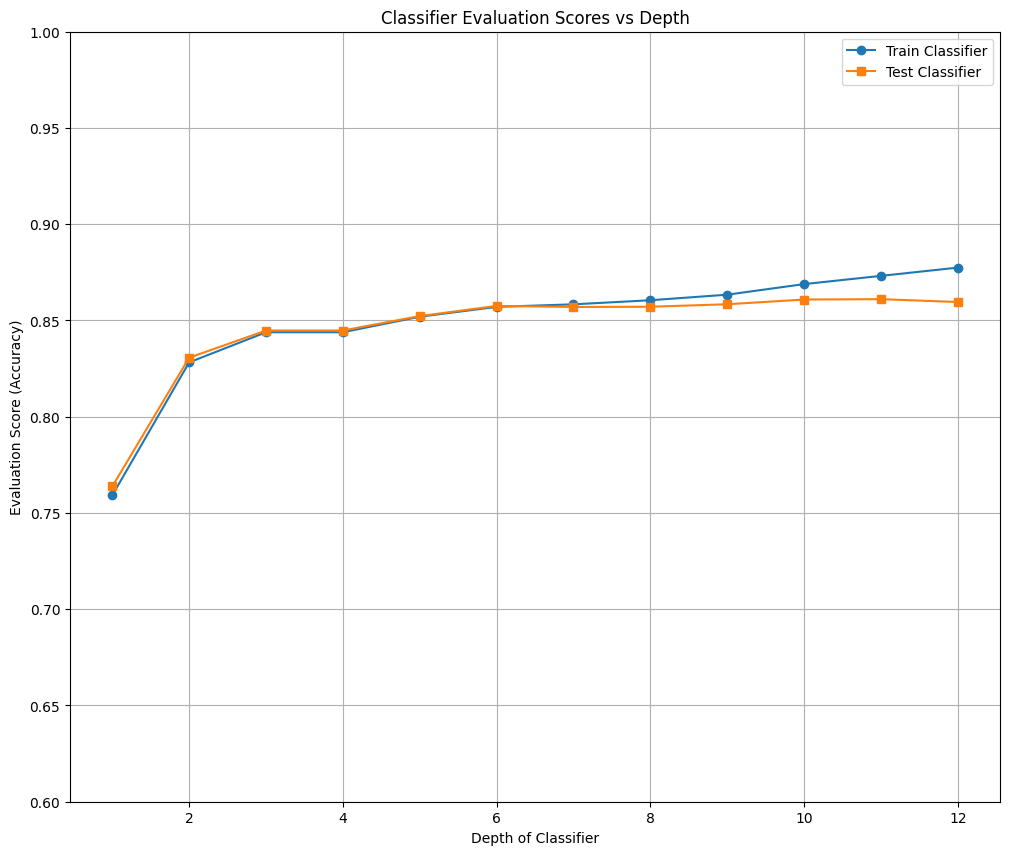

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

custom_depths = range(1, 13)
test_dict = {}
train_dict = {}
for d in custom_depths:
    pipeline = make_pipeline(
        DictVectorizer(), # Convert data to correct format
        StandardScaler(with_mean=False), # Scales features to better suit the model
        SelectKBest(f_classif, k=50), # Selects the best 50 features based on f_classif
        DecisionTreeClassifier(max_depth=d) # Our chosen classifier
    )
    
    pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
    train_score = pipeline.score(Xtrain.to_dict(orient='records'), Ytrain)
    test_score = pipeline.score(Xtest.to_dict(orient='records'), Ytest)
    train_dict[d] = train_score
    test_dict[d] = test_score
    
plot_classifier_scores(train_dict, test_dict)

We can see that overfitting is still present since the training data accuracy always increases wityh depth while the test opne doesn't but the test data results do not decrease even close to as drastically as with our implemented version.

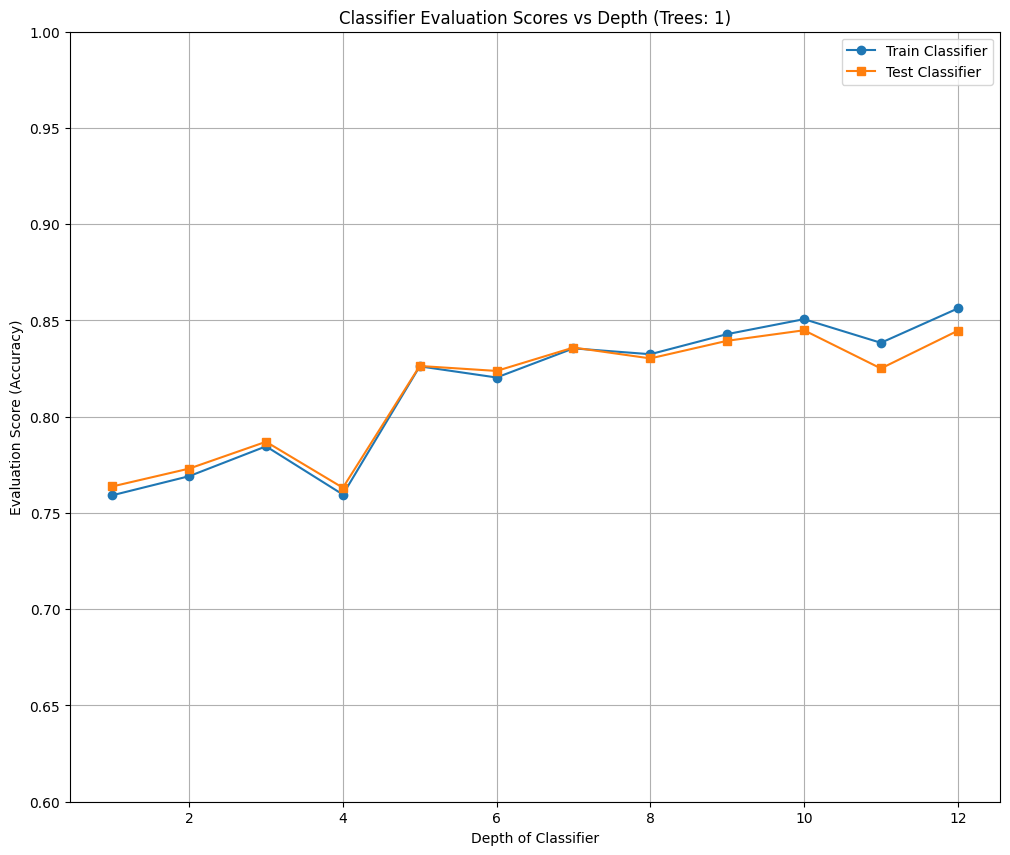

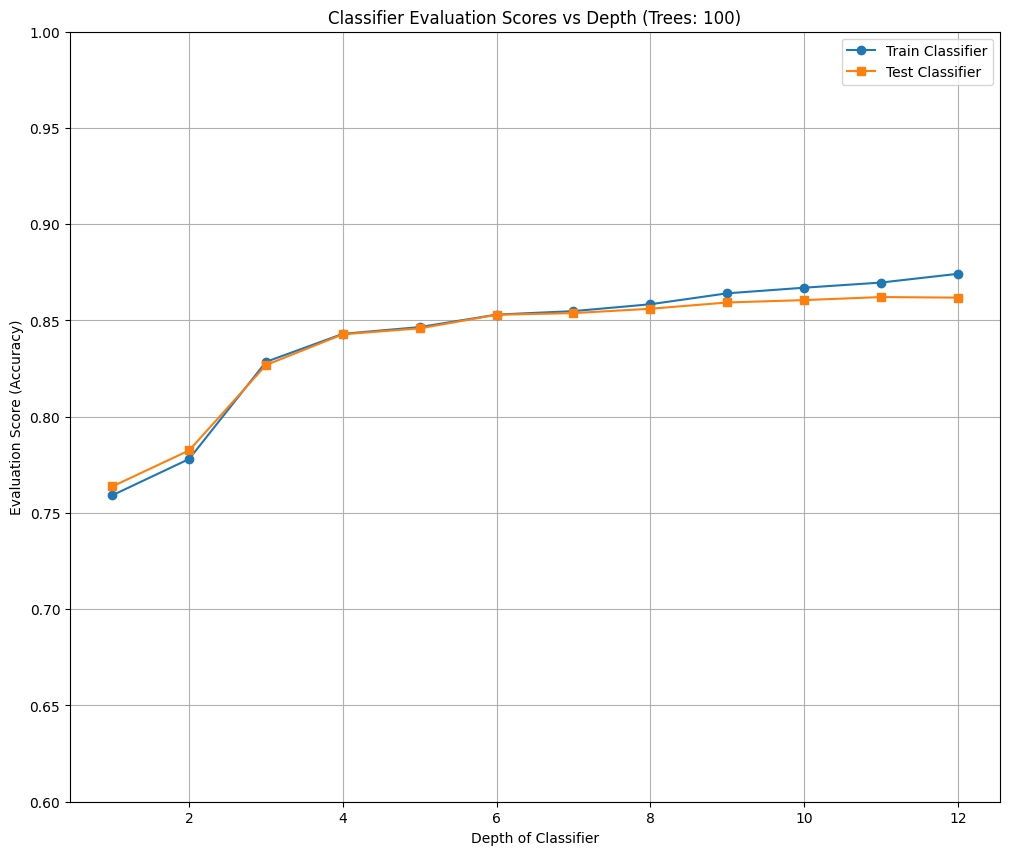

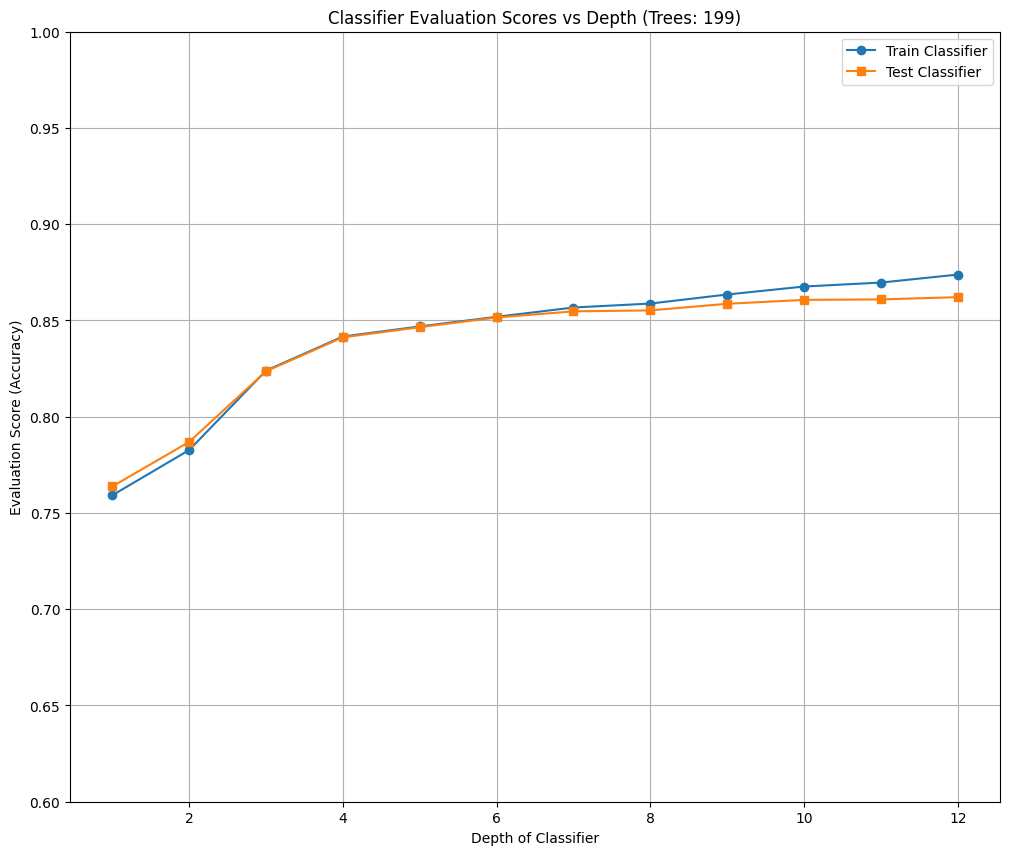

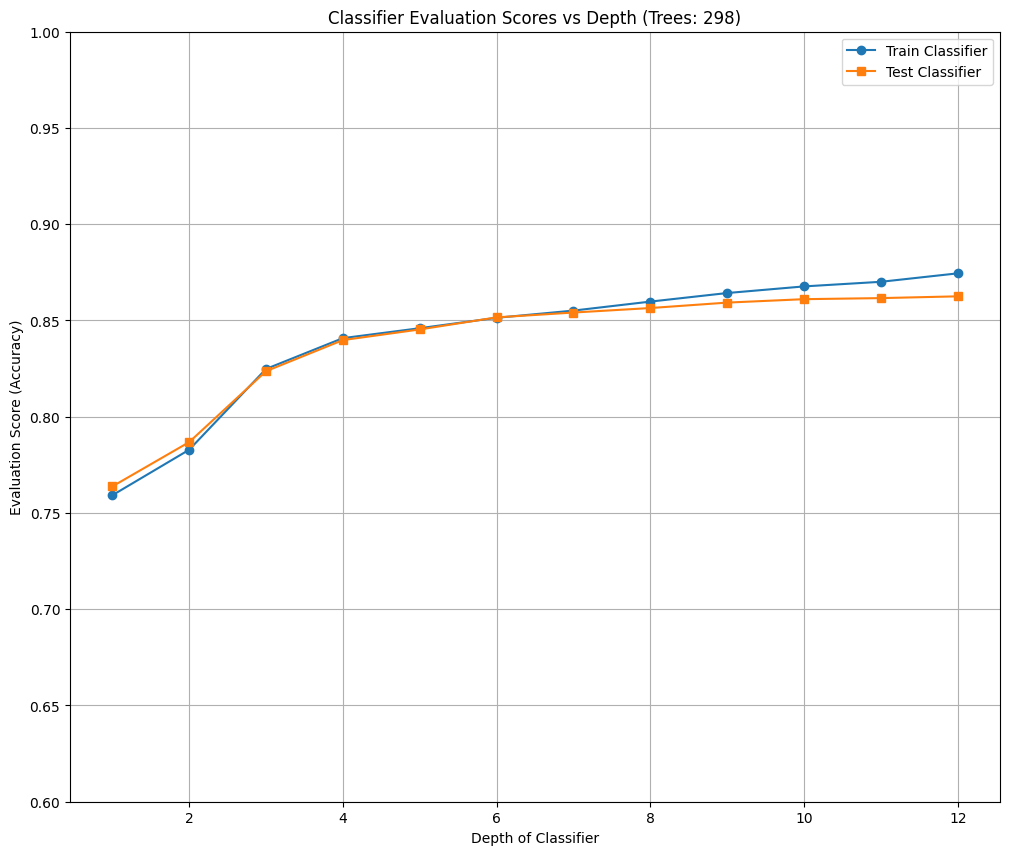

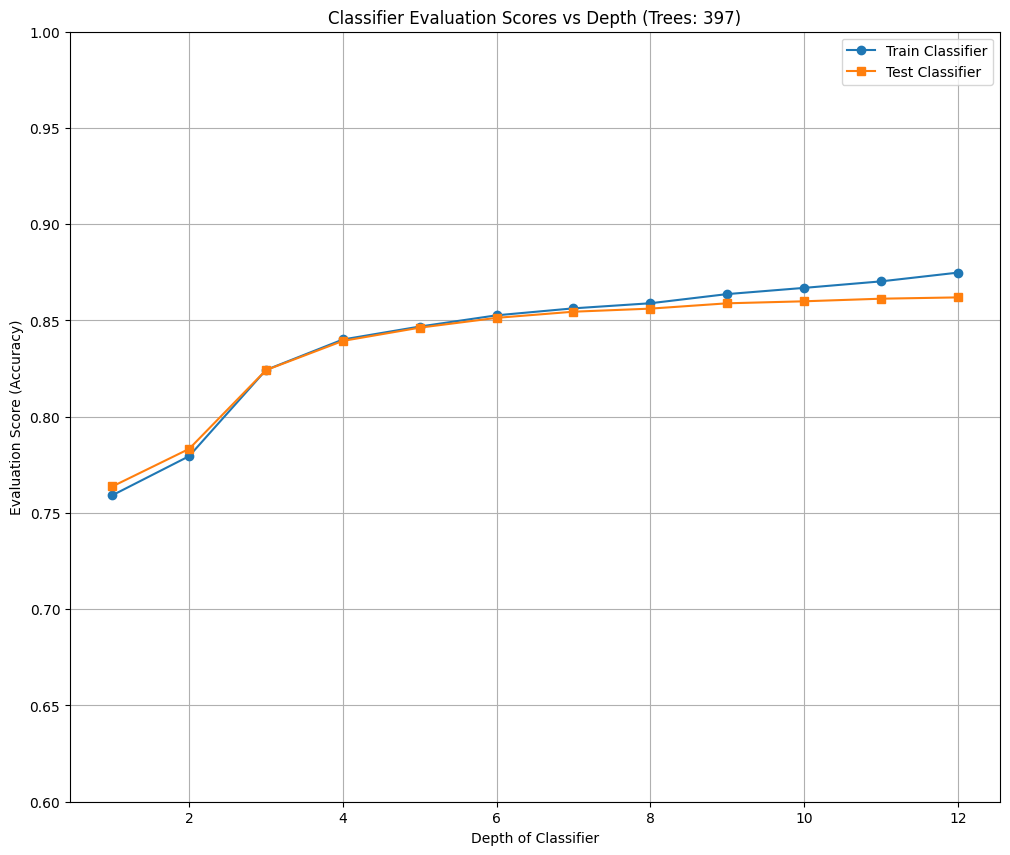

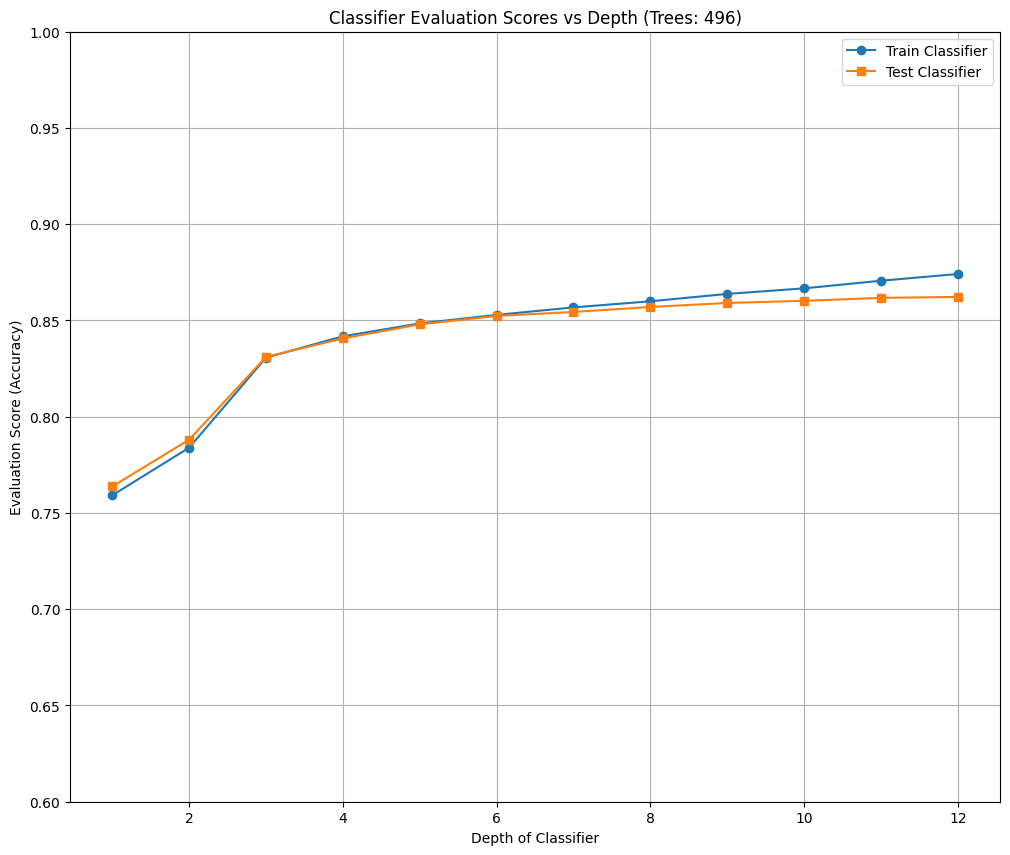

In [22]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
custom_depths = range(1, 13)
    
number_of_graphs = range(0, 6)
tree_growth = 99

for n in number_of_graphs:
    test_dict = {}
    train_dict = {}
    for d in custom_depths:
        pipeline = make_pipeline(
            DictVectorizer(), # Convert data to correct format
            StandardScaler(with_mean=False), # Scales features to better suit the model
            SelectKBest(f_classif, k=50), # Selects the best 50 features based on f_classif
            RandomForestClassifier(n_estimators=(tree_growth*n)+1, n_jobs=-1, max_depth=d) # Our chosen classifier
        )
        
        pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
        train_score = pipeline.score(Xtrain.to_dict(orient='records'), Ytrain)
        test_score = pipeline.score(Xtest.to_dict(orient='records'), Ytest)
        train_dict[d] = train_score
        test_dict[d] = test_score
    
    plot_classifier_scores(train_dict, test_dict, (n*tree_growth)+1)

- The Decision Tree curve shows us that it is a lot consistent in its improvement than the Random forrest one. This is because the Random forrest algorithm depends on the average of several trees so with only one it is super inconsistent.
- We can further see this as we look at the graphs with higher and higher number of trees as the graphs get smoother and smoother proportionally.
- As the ensamble size grows so does the best test accuracy but it plateaus after a certain amount.
- Training time increases with the ensamble size.